In [208]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
df = pd.read_csv('athletes.csv')

print(df[['nationality', 'disciplines']])
#df.head(5)

               nationality    disciplines
0                   Mexico    ['Archery']
1                   Mexico    ['Archery']
2                   Mexico    ['Archery']
3                   Mexico    ['Archery']
4                   Mexico    ['Archery']
...                    ...            ...
11110           Azerbaijan  ['Wrestling']
11111           Azerbaijan  ['Wrestling']
11112  Republic of Moldova  ['Wrestling']
11113              Albania  ['Wrestling']
11114                    0  ['Wrestling']

[11115 rows x 2 columns]


In [48]:
df.describe()

,code,height,weight
count,1.111500e+04,11115.000000,11099.000000
mean,1.887426e+06,81.835178,2.213713
std,3.587687e+05,89.504711,13.114771
min,1.532872e+06,0.000000,0.000000
25%,1.888186e+06,0.000000,0.000000
50%,1.918842e+06,0.000000,0.000000
75%,1.948950e+06,177.000000,0.000000
max,9.460001e+06,222.000000,113.000000


     nationality  count
0              0     17
1    Afghanistan     11
2        Albania      8
3        Algeria     46
4        Andorra      2
..           ...    ...
193    Venezuela     32
194      Vietnam     16
195        Yemen      4
196       Zambia     31
197     Zimbabwe      7

[198 rows x 2 columns]


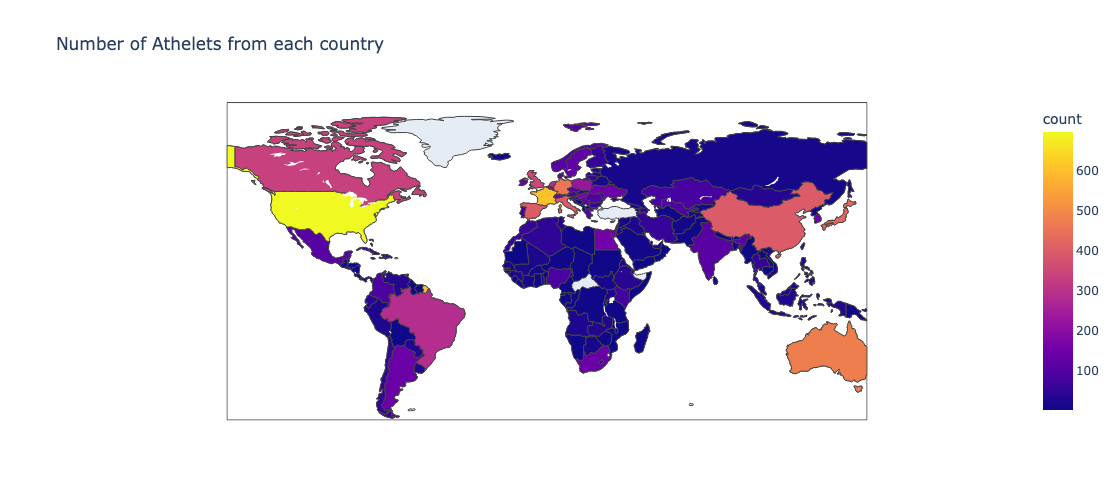

In [148]:
nationality_counts = df.groupby('nationality').size()
nationality_counts = nationality_counts.reset_index(name='count')
print(nationality_counts)

#plt.figure(figsize=(50,10))
#plt.bar(nationality_counts['nationality'], nationality_counts['count'], color = 'skyblue')
#plt.yscale('log')

fig = px.choropleth(nationality_counts, locations='nationality', locationmode= 'country names', color='count', 
                    title='Number of Athelets from each country') 

fig.update_layout(width=1000, height= 500)

#plt.title('Number of Athelets from each country')
#plt.xlabel('Nationality')
#plt.ylabel('Count')

#plt.xticks(rotation=45)
fig.show()

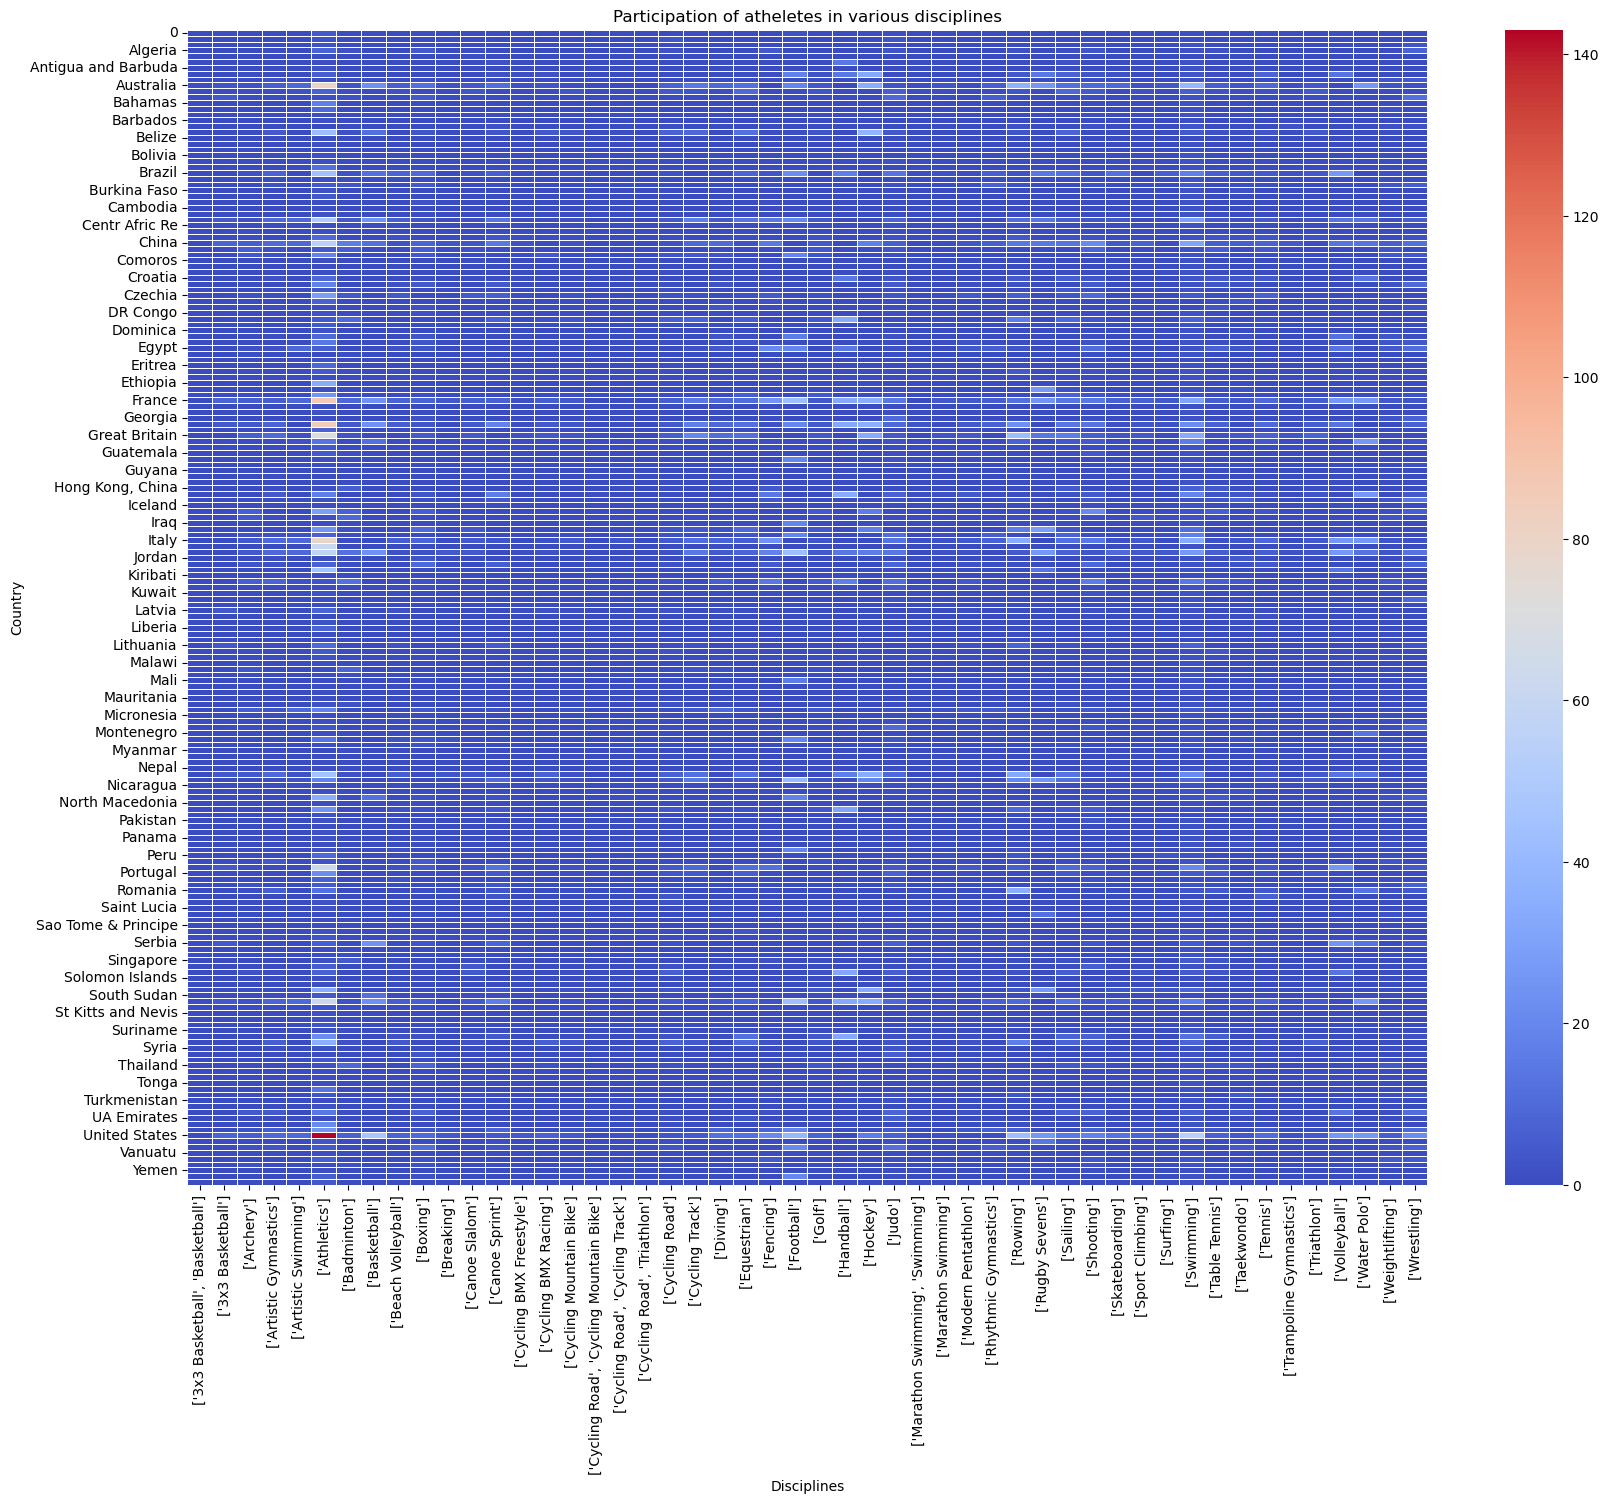

In [134]:
#grouped_data = df.groupby(['nationality','disciplines']).size().reset_index(name='count')
#pivot_data = grouped_data.pivot(index='nationality',columns='disciplines',values='count').fillna(0)
#pivot_data.plot(kind='bar', stacked = True, figsize=(20,10))

plt.figure(figsize=(20, 15))
sns.heatmap(pivot_data, cmap='coolwarm', linewidths=.5, annot=False)

plt.title('Participation of atheletes in various disciplines')
plt.xlabel('Disciplines')
plt.ylabel('Country')
#plt.legend(title='Discipline',bbox_to_anchor=(1.05,1), loc='upper left')

plt.show()

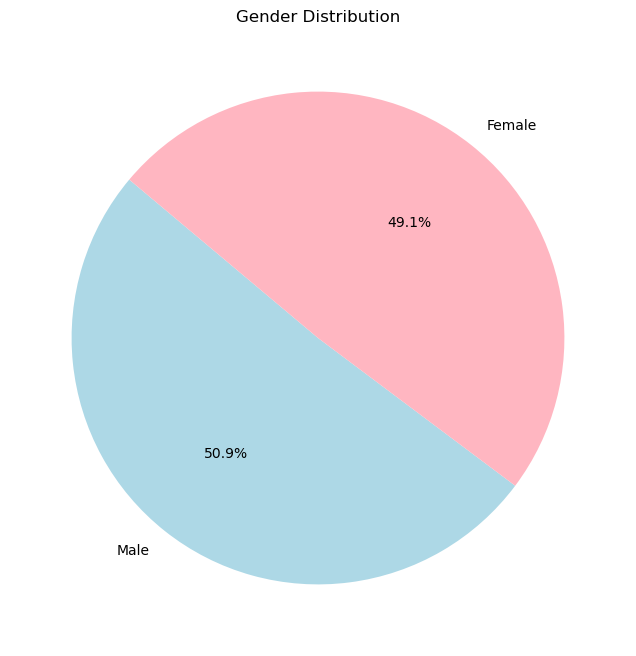

In [138]:
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(gender_counts, labels = gender_counts.index, autopct='%1.1f%%', colors=['lightblue','lightpink'], startangle=140)
plt.title('Gender Distribution')

plt.show()

In [160]:
df['birth_date'] = pd.to_datetime(df['birth_date'], format='%Y-%m-%d')

current_date = pd.to_datetime(datetime.now().strftime('%Y-%m-%d'))
df['age'] = df['birth_date'].apply(lambda x: (current_date - x).days // 365)

average_age_by_sport = df.groupby('disciplines')['age'].mean().reset_index()

print(average_age_by_sport)

                                  disciplines        age
0            ['3x3 Basketball', 'Basketball']  26.000000
1                          ['3x3 Basketball']  29.718750
2                                 ['Archery']  25.085938
3                     ['Artistic Gymnastics']  23.531579
4                       ['Artistic Swimming']  22.820755
5                               ['Athletics']  26.651013
6                               ['Badminton']  26.897143
7                              ['Basketball']  27.958188
8                        ['Beach Volleyball']  29.458333
9                                  ['Boxing']  26.157258
10                               ['Breaking']  26.666667
11                           ['Canoe Slalom']  28.142857
12                           ['Canoe Sprint']  27.092050
13                  ['Cycling BMX Freestyle']  24.333333
14                     ['Cycling BMX Racing']  25.223881
15                  ['Cycling Mountain Bike']  27.117647
16  ['Cycling Road', 'Cycling M

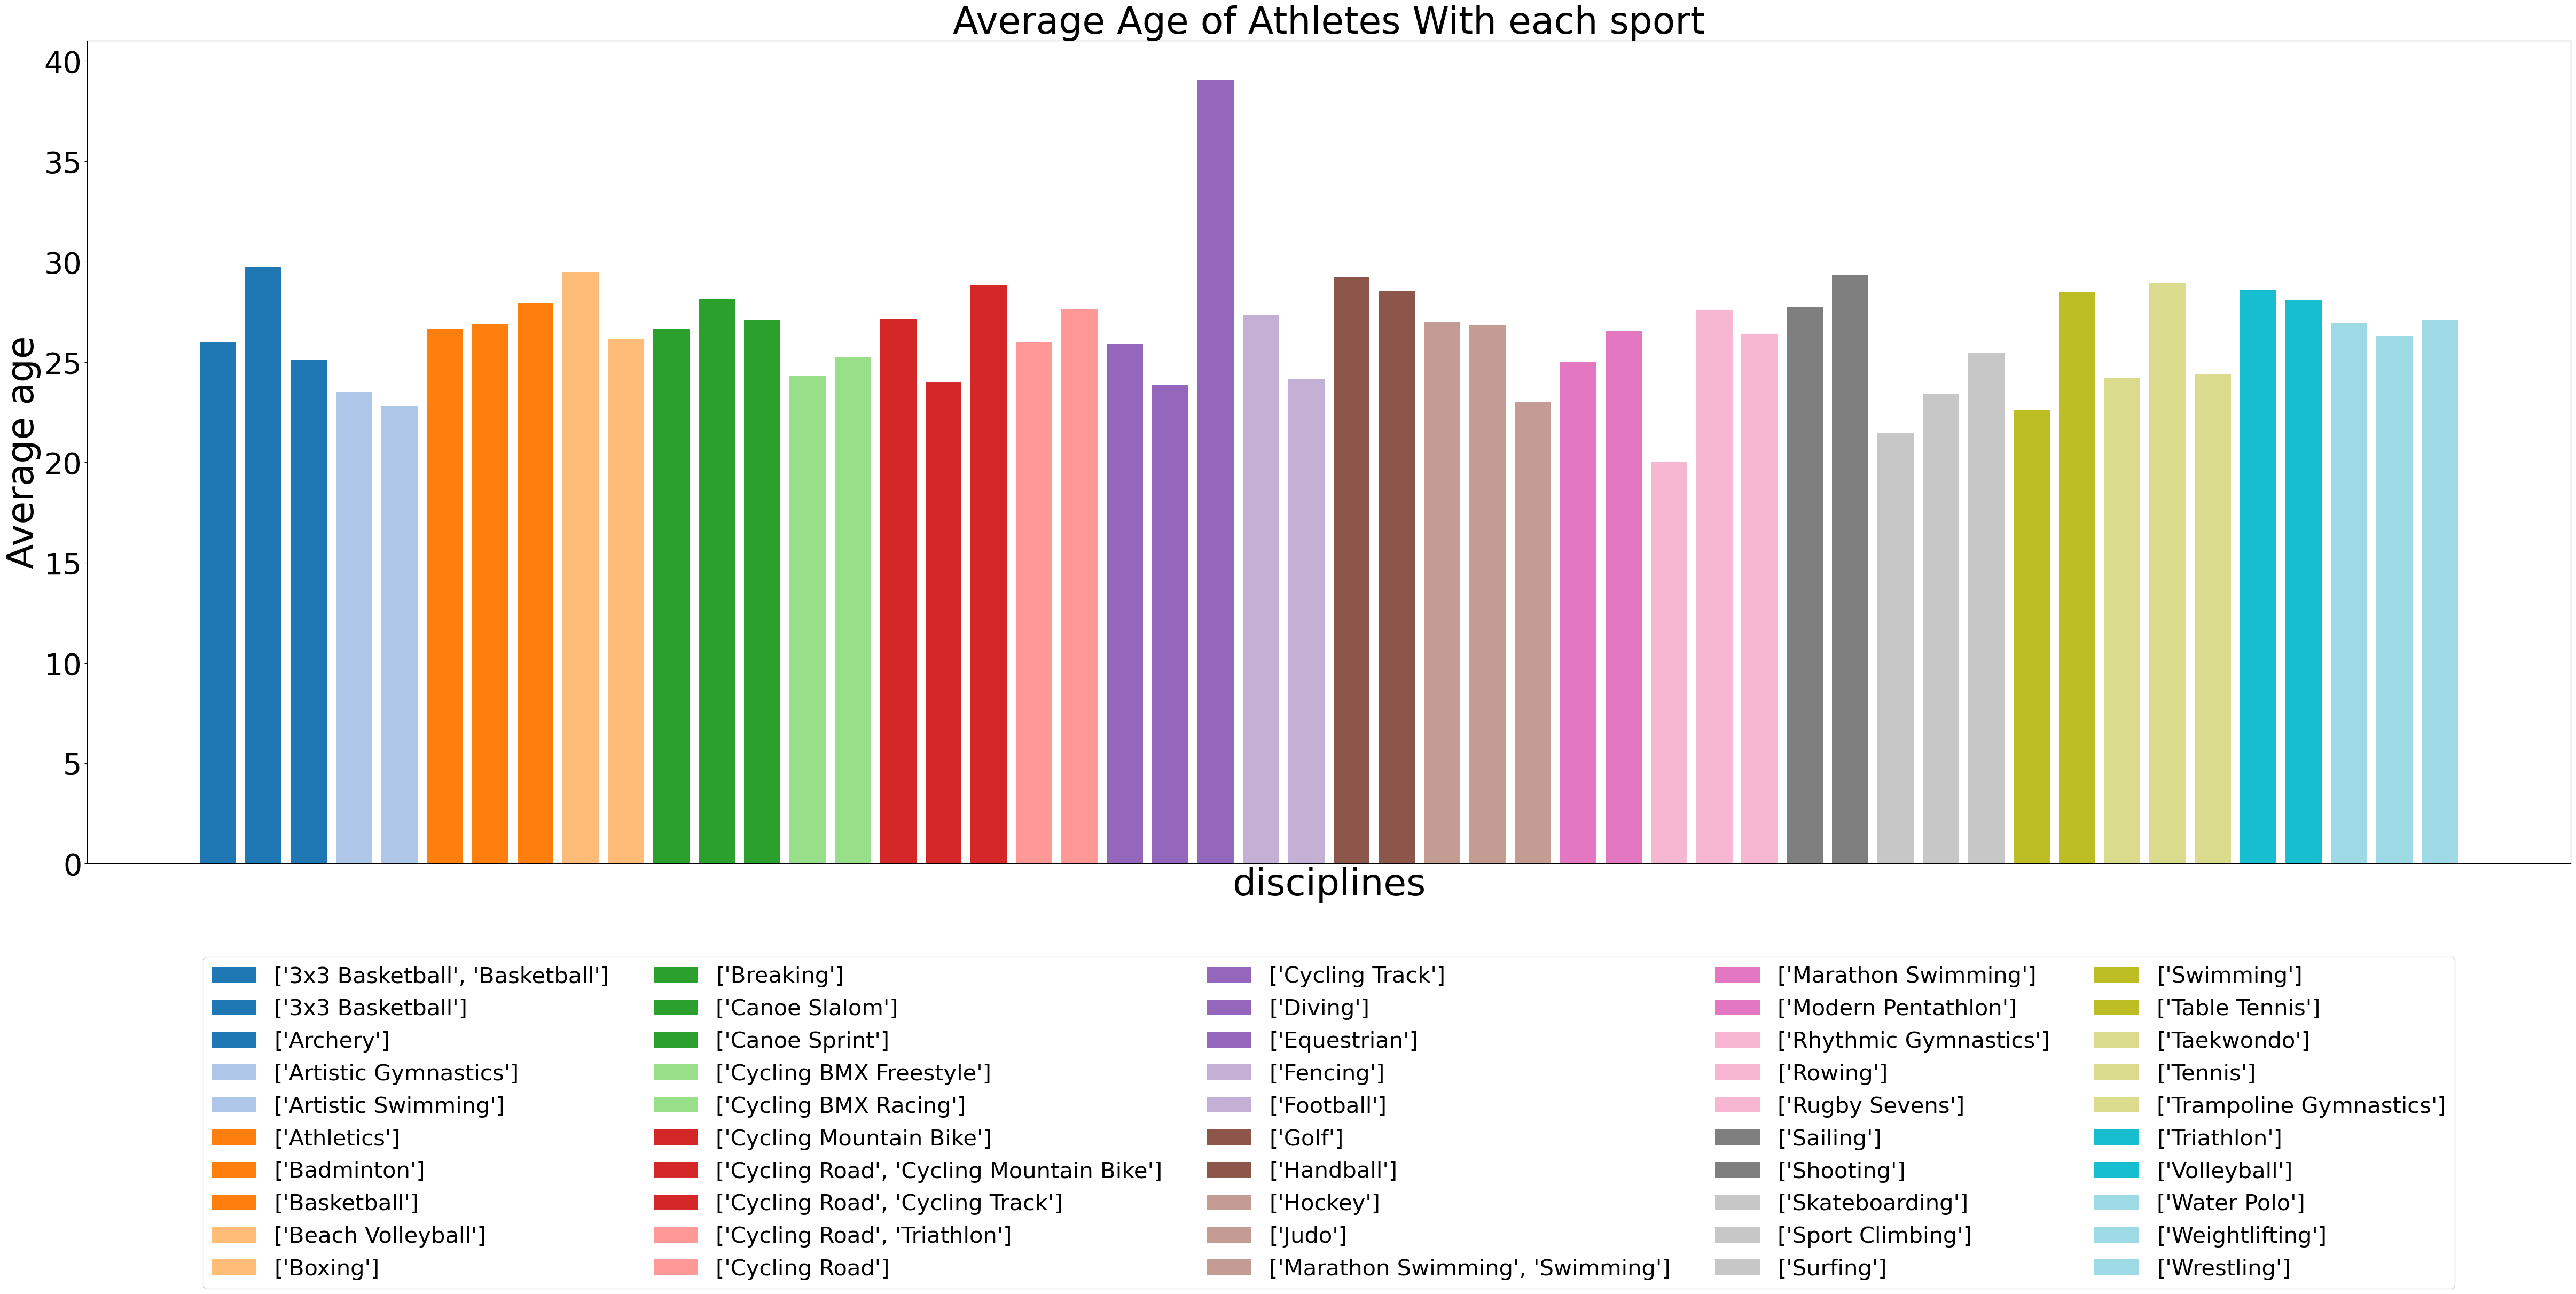

In [298]:
plt.figure(figsize=(60,20))
bars = plt.bar(average_age_by_sport['disciplines'], average_age_by_sport['age'], color = colors)
labels = average_age_by_sport['disciplines']

num_disciplines = len(average_age_by_sport)
cmap = plt.get_cmap('tab20')
colors = cmap(np.linspace(0, 1, num_disciplines))
num_columns = 5

plt.title('Average Age of Athletes With each sport', fontsize = 50)
plt.xlabel('disciplines', fontsize = 50)
plt.ylabel('Average age', fontsize = 50)
plt.legend(bars, labels, bbox_to_anchor=(0.5, -0.1), loc='upper center', fontsize=30, ncol=num_columns)
plt.xticks([])
plt.yticks(fontsize = 40)

plt.show()